# Question1

In [ ]:
from google.colab import drive, files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
import os

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
df = pd.DataFrame(mnist.data,columns=[i for i in range(0,784)])
df['Output'] = mnist.target.astype('int')
df_req = df[df['Output'] <= 4]
df_std = pd.DataFrame((StandardScaler().fit(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)]))).transform(pd.DataFrame(mnist.data,columns=[i for i in range(0,784)])))
df_req_std = df[df['Output'] <= 4]


# mnist = fetch_openml('mnist_784')
# df['Output'] = mnist.target.astype('int')
# df_req = df[df['Output'] <= 4]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


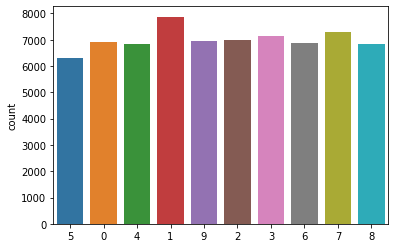

In [ ]:
sns.countplot(mnist['target'])

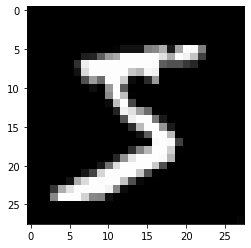

In [ ]:
# s = pd.read_csv("mnist_train.csv")
data = np.matrix(df)

output = data[:, 0]

data = np.delete(data, 0, 1)


img = data[0].reshape(28,28)

# And displaying the image
plt.imshow(img, cmap="gray")

11493376/11490434 [==============================] - 0s 0us/step


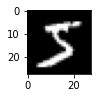

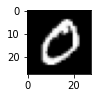

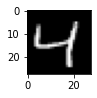

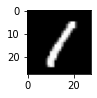

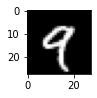

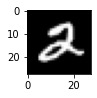

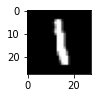

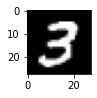

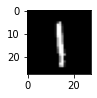

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
X=df_req.iloc[:,:-1]
Y=df_req['Output']

X_std=df_req_std.iloc[:,:-1]
Y_std=df_req_std['Output']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
# print(X)
pca_sk = pca.fit_transform(X)
print("Total no of components required: ",pca.n_components_)
print(pca)

pca_sk_std = pca.fit_transform(X_std)
print("Total no of components required: ",pca.n_components_)
print(pca)

Total no of components required:  77
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
Total no of components required:  77
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_testval, y_train, y_testval = train_test_split(pca_sk,Y,test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_testval, y_testval, test_size = 0.3)

x_train_std, x_testval_std, y_train_std, y_testval_std = train_test_split(pca_sk_std,Y_std,test_size = 0.3)
x_val_std, x_test_std, y_val_std, y_test_std = train_test_split(x_testval_std, y_testval_std, test_size = 0.3)

In [ ]:
param1 = {'n_neighbors' : [3,4,5,6], 'weights' : ('uniform','distance')}
param2 = {'kernel' : ('linear','poly','rbf'), 'C' : [0.8,1.0,1.2], 'tol' : [0.01,0.1,1.0]}
param3 = {'penalty' : ('l1','l2'), 'tol' : [0.01,0.1,1.0], 'class_weight' : (None,'balanced')}

In [ ]:
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
knn = GSCV(KNC(), param1)
svc = GSCV(SVC(), param2)
perceptron = GSCV(Perceptron(), param3)

knn_std = GSCV(KNC(), param1)
svc_std = GSCV(SVC(), param2)
perceptron_std = GSCV(Perceptron(), param3)

In [ ]:
knn.fit(x_val,y_val)
knn.cv_results_

{'mean_fit_time': array([0.05669861, 0.05577679, 0.05563469, 0.05612998, 0.05879745,
        0.05861955, 0.05789208, 0.05755439]),
 'mean_score_time': array([1.1858377 , 1.11844001, 1.13487129, 1.10895333, 1.27166915,
        1.16691771, 1.25360618, 1.21274953]),
 'mean_test_score': array([0.9865408 , 0.98694062, 0.98320933, 0.98667413, 0.98494133,
        0.98560773, 0.98307573, 0.98587431]),
 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 4, 'weights'

In [ ]:
knn_std.fit(x_val_std,y_val_std)
knn_std.cv_results_

{'mean_fit_time': array([0.05769649, 0.05707941, 0.05755424, 0.05831308, 0.05593352,
        0.05581059, 0.05696502, 0.0534678 ]),
 'mean_score_time': array([1.10943875, 1.04568481, 1.15062404, 1.1266603 , 1.18996677,
        1.10621676, 1.18466473, 1.09271245]),
 'mean_test_score': array([0.98680711, 0.98734008, 0.98520737, 0.98787324, 0.98574044,
        0.98640684, 0.98347502, 0.9870736 ]),
 'param_n_neighbors': masked_array(data=[3, 3, 4, 4, 5, 5, 6, 6],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'weights': 'uniform'},
  {'n_neighbors': 3, 'weights': 'distance'},
  {'n_neighbors': 4, 'weights'

In [ ]:
svc.fit(x_val,y_val)
svc.cv_results_

In [ ]:
svc_std.fit(x_val_std,y_val_std)
svc_std.cv_results_

In [ ]:
perceptron.fit(x_val,y_val)
perceptron.cv_results_

{'mean_fit_time': array([0.23593087, 0.24203825, 0.24147258, 0.14023838, 0.1373405 ,
        0.13084302, 0.25704103, 0.25884929, 0.25185847, 0.12404065,
        0.1261857 , 0.12387724]),
 'mean_score_time': array([0.00205708, 0.00199757, 0.0017395 , 0.00205479, 0.00167093,
        0.00170608, 0.00283723, 0.00276103, 0.00197911, 0.00166903,
        0.00173893, 0.00169721]),
 'mean_test_score': array([0.91964131, 0.91964131, 0.91964131, 0.90898299, 0.90898299,
        0.90898299, 0.91844166, 0.91844166, 0.91844166, 0.91897402,
        0.91897402, 0.91897402]),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l1', 'l2', 'l2', 

In [ ]:
perceptron_std.fit(x_val_std,y_val_std)
perceptron_std.cv_results_

{'mean_fit_time': array([0.24363551, 0.23028121, 0.23175879, 0.1232091 , 0.11852641,
        0.11995773, 0.24967365, 0.2555789 , 0.25318899, 0.12082648,
        0.12465415, 0.11681952]),
 'mean_score_time': array([0.00291224, 0.00219779, 0.00219207, 0.00172811, 0.00164433,
        0.00170355, 0.0022037 , 0.00273924, 0.00215654, 0.00166888,
        0.00170207, 0.00166311]),
 'mean_test_score': array([0.92657206, 0.92657206, 0.92657206, 0.91644237, 0.91644237,
        0.91644237, 0.91844379, 0.91844379, 0.91844379, 0.92630486,
        0.92630486, 0.92630486]),
 'param_class_weight': masked_array(data=[None, None, None, None, None, None, 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced',
                    'balanced'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l1', 'l1', 'l2', 'l2', 

In [ ]:
estimator1 = knn.best_estimator_
# estimator2 = svc.best_estimator_
estimator3 = perceptron.best_estimator_

estimator1_std = knn_std.best_estimator_
# estimator2_std = svc_std.best_estimator_
estimator3_std = perceptron_std.best_estimator_

In [ ]:
from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.multiclass import OneVsRestClassifier as OVA
ovo = [OVO(estimator1),OVO(estimator3),OVO(estimator1_std),OVO(estimator3_std)]
ova = [OVA(estimator1),OVA(estimator3),OVA(estimator1_std),OVA(estimator3_std)]
# ovo = [OVO(estimator1),OVO(estimator2),OVO(estimator3),OVO(estimator1_std),OVO(estimator2_std),OVO(estimator3_std)]
# ova = [OVA(estimator1),OVA(estimator2),OVA(estimator3),OVA(estimator1_std),OVA(estimator2_std),OVA(estimator3_std)]
# for j in [kno,svo,peo] :
#   ovo.append(OVO(j))
#   ova.append(OVA(j))

In [ ]:
knn_test1 = (ovo[0].fit(x_train,y_train)).score(x_test,y_test)
# svc_test1 = (ovo[1].fit(x_train,y_train)).score(x_test,y_test)
perceptron_test1 = (ovo[1].fit(x_train,y_train)).score(x_test,y_test)

knn_test1_std = (ovo[2].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)
# svc_test1_std = (ovo[4].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)
perceptron_test1_std = (ovo[3].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)

In [ ]:
knn_test2 = (ova[0].fit(x_train,y_train)).score(x_test,y_test)
# svc_test2 = (ova[1].fit(x_train,y_train)).score(x_test,y_test)
perceptron_test2 = (ova[1].fit(x_train,y_train)).score(x_test,y_test)

knn_test2_std = (ova[2].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)
# svc_test2_std = (ova[4].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)
perceptron_test2_std = (ova[3].fit(x_train_std,y_train_std)).score(x_test_std,y_test_std)

In [ ]:
print("Original dataset")
print("Accuracy of Nearest Neighbor Classifier with OVO Configuration:",knn_test1*100,"%")
print("Accuracy of Nearest Neighbor Classifier with OVA Configuration:",knn_test2*100,"%")

Original dataset
Accuracy of Nearest Neighbor Classifier with OVO Configuration: 99.31613304320796 %
Accuracy of Nearest Neighbor Classifier with OVA Configuration: 99.34721790488032 %


In [ ]:
print("Standardised dataset")
print("Accuracy of Nearest Neighbor Classifier with OVO Configuration:",knn_test1_std*100,"%")
print("Accuracy of Nearest Neighbor Classifier with OVA Configuration:",knn_test2_std*100,"%")

Standardised dataset
Accuracy of Nearest Neighbor Classifier with OVO Configuration: 99.06745414982903 %
Accuracy of Nearest Neighbor Classifier with OVA Configuration: 99.0052844264843 %


In [ ]:
print("Original dataset")
print("Accuracy of Support Vector Classifier with OVO Configuration:",svc_test1*100,"%")
print("Accuracy of Support Vector Classifier with OVA Configuration:",svc_test2*100,"%")

Original dataset
Accuracy of Support Vector Classifier with OVO Configuration: 99.2719257718821 %
Accuracy of Support Vector Classifier with OVA Configuration: 99.29163819129931 %


In [ ]:
print("Standardised dataset")
print("Accuracy of Support Vector Classifier with OVO Configuration:",svc_test1_std*100,"%")
print("Accuracy of Support Vector Classifier with OVA Configuration:",svc_test2_std*100,"%")

Standardised dataset
Accuracy of Support Vector Classifier with OVO Configuration: 99.3992619201817 %
Accuracy of Support Vector Classifier with OVA Configuration: 99.3156287982227 %


In [ ]:
print("Original dataset")
print("Accuracy of Perceptron Classifier with OVO Configuration:",perceptron_test1*100,"%")
print("Accuracy of Perceptron Classifier with OVA Configuration:",perceptron_test2*100,"%")

Original dataset
Accuracy of Perceptron Classifier with OVO Configuration: 96.20764687597139 %
Accuracy of Perceptron Classifier with OVA Configuration: 89.9906745414983 %


In [ ]:
print("Standardised dataset")
print("Accuracy of Perceptron Classifier with OVO Configuration:",perceptron_test1_std*100,"%")
print("Accuracy of Perceptron Classifier with OVA Configuration:",perceptron_test2_std*100,"%")

Standardised dataset
Accuracy of Perceptron Classifier with OVO Configuration: 95.64811936586882 %
Accuracy of Perceptron Classifier with OVA Configuration: 92.7883120920112 %


#Question 02

In [ ]:
from google.colab import drive

##Read dataset from csv file

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ML/datasets/diabetes.csv' 
df= pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Preview Dataset and Exploratory Data Analysis

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
 df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

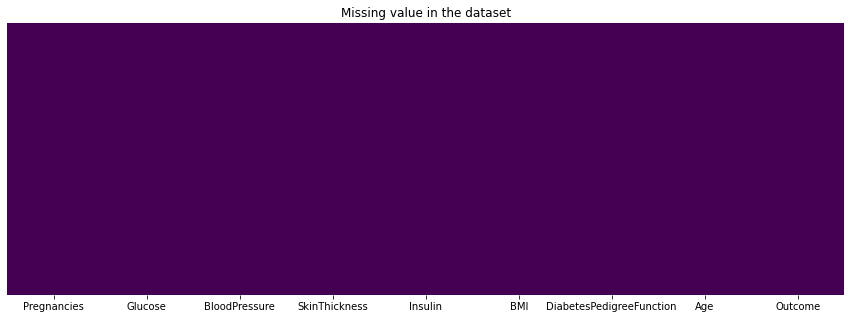

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

##Visualizing the Target Variable

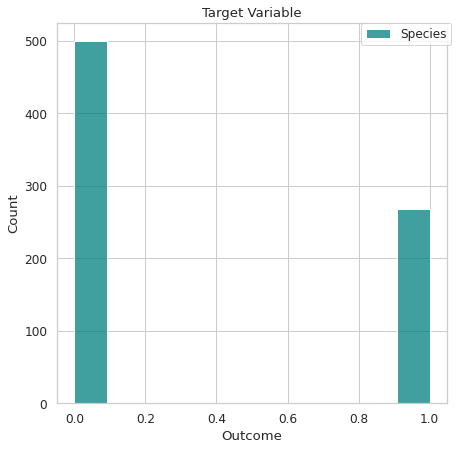

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [7,7]})
sns.histplot(data = df, x="Outcome", color="teal", label="Species")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Target Variable")
plt.show()

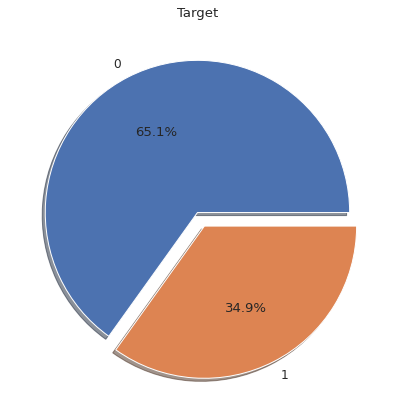

In [ ]:
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Target')
plt.ylabel('')
plt.show()

##Visualizing all the Features

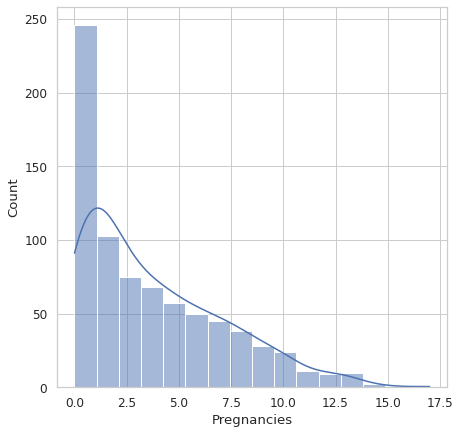

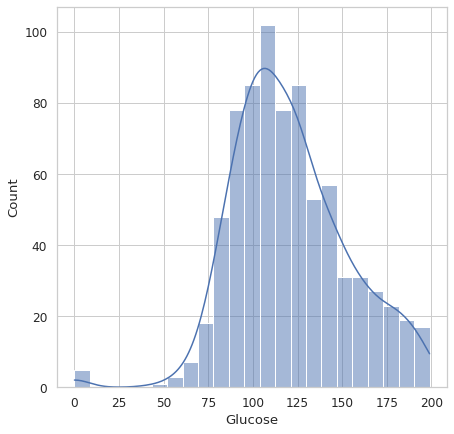

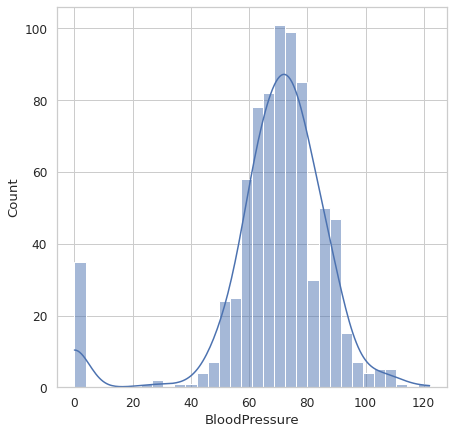

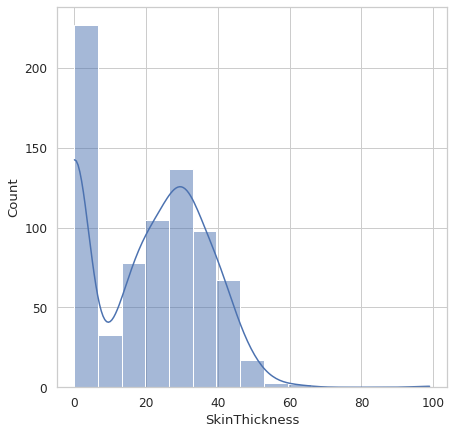

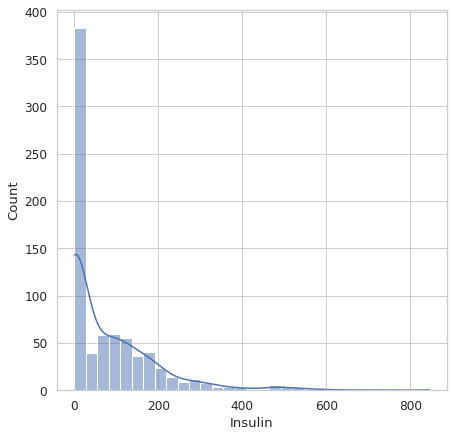

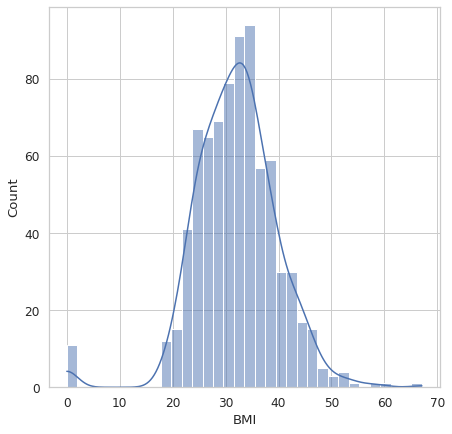

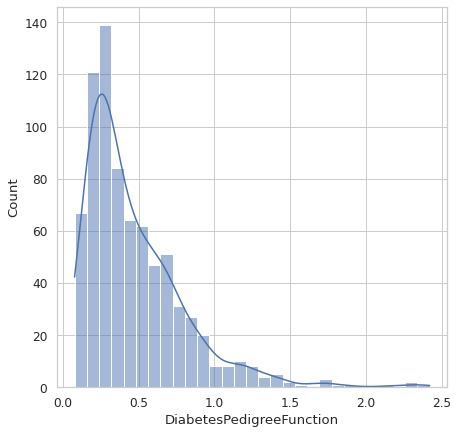

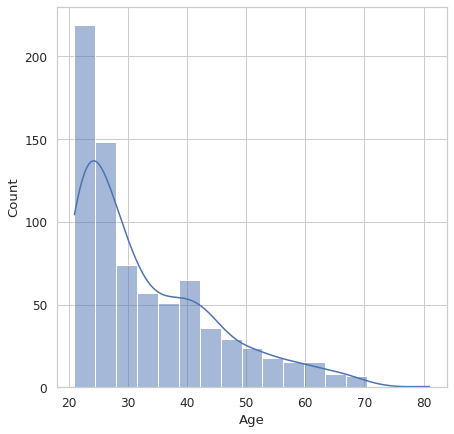

In [ ]:
att = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
for i in att:
  sns.histplot(df[i],fill=True, kde=True)
  plt.show()

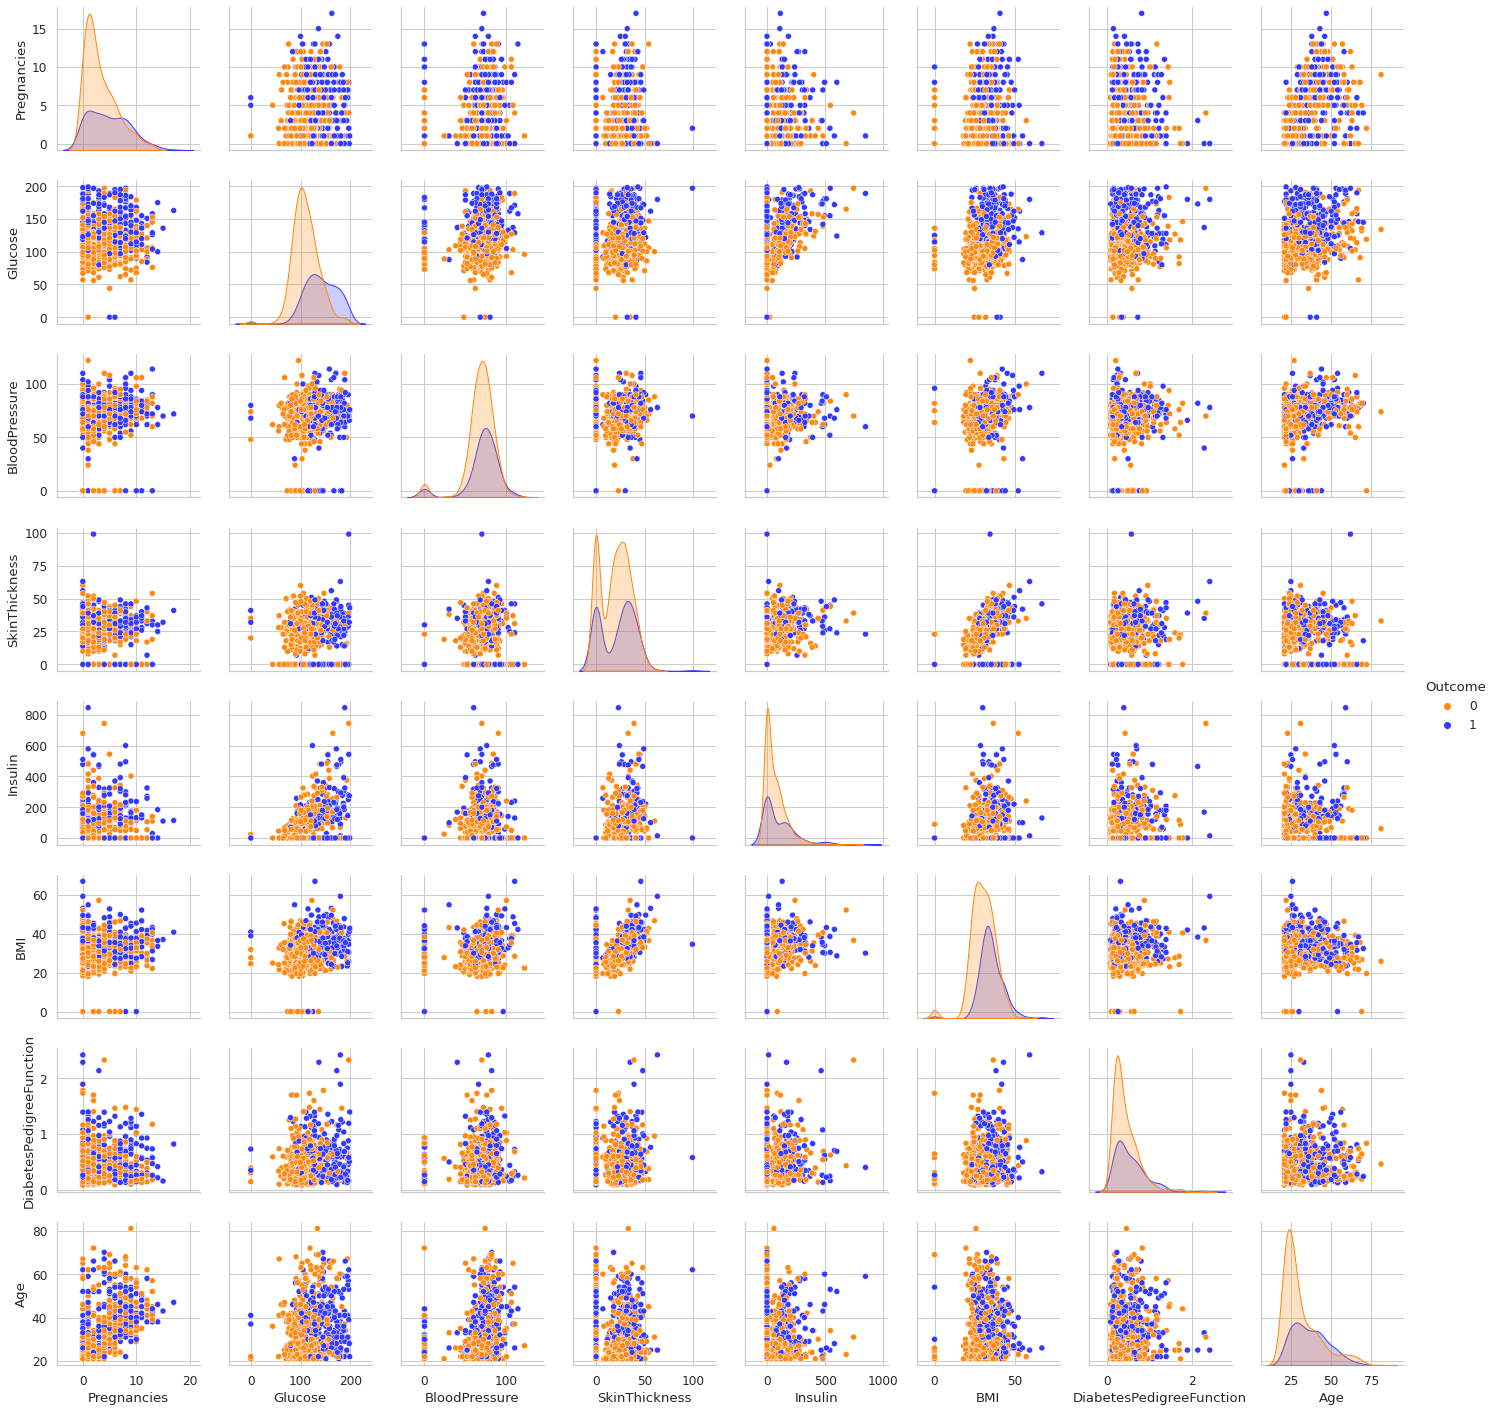

In [ ]:
sns.pairplot(df,hue='Outcome',palette = ["#ff8811","#3339FF"])
plt.show()

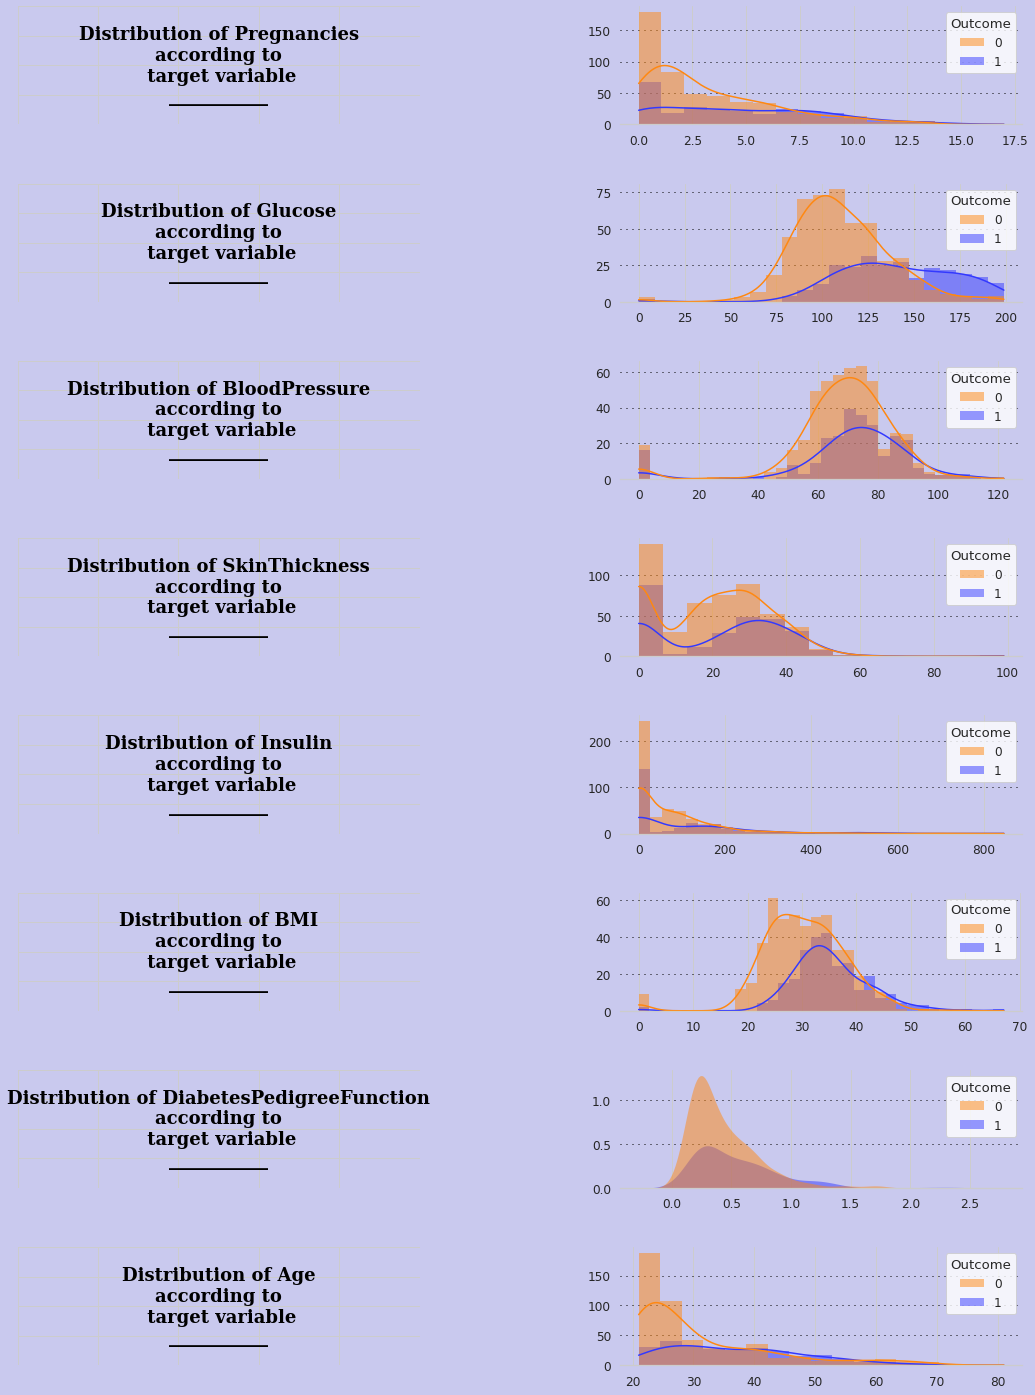

In [ ]:
fig = plt.figure(figsize=(18,25))
gs = fig.add_gridspec(8,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])
ax14 = fig.add_subplot(gs[7,0])
ax15 = fig.add_subplot(gs[7,1])


background_color = "#c9c9ee"
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)

# Pregnancies title
ax0.text(0.5,0.5,"Distribution of Pregnancies\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Pregnancies
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1, data=df, x='Pregnancies', hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0, kde=True)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose title
ax2.text(0.5,0.5,"Distribution of Glucose\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Glucose
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3, data=df, x='Glucose',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], kde=True, alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# BloodPressure title
ax4.text(0.5,0.5,"Distribution of BloodPressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# BloodPressure
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5, data=df, x='BloodPressure',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], kde=True,alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# SkinThickness title
ax6.text(0.5,0.5,"Distribution of SkinThickness\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# SkinThickness
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax7, data=df, x='SkinThickness',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], kde=True,alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Insulin title
ax8.text(0.5,0.5,"Distribution of Insulin\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Insulin
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax9, data=df, x='Insulin',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"],kde=True, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# BMI title
ax10.text(0.5,0.5,"Distribution of BMI\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)

# BMI
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax11, data=df, x='BMI',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], kde=True,alpha=.5, linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")

# DPF title
ax12.text(0.5,0.5,"Distribution of DiabetesPedigreeFunction\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.tick_params(left=False, bottom=False)

# DPF
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax13, data=df, x='DiabetesPedigreeFunction',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")

# Age title
ax14.text(0.5,0.5,"Distribution of Age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
ax14.tick_params(left=False, bottom=False)

# Age
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax15, data=df, x='Age',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, kde=True,linewidth=0)
ax15.set_xlabel("")
ax15.set_ylabel("")



for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)

##Searching for Outliers

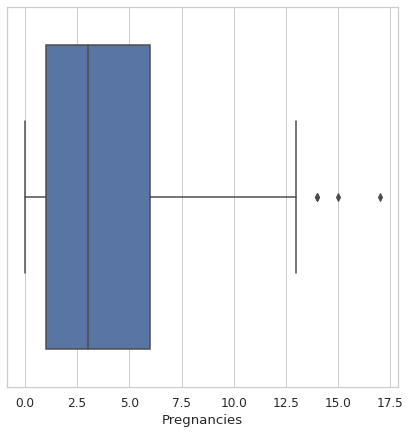

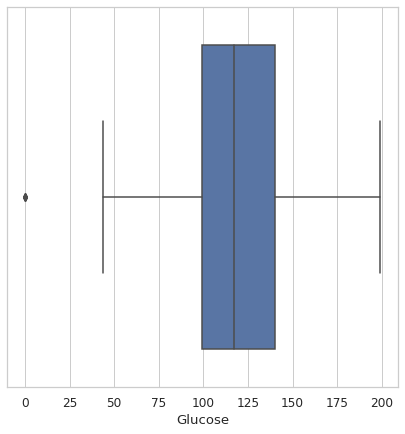

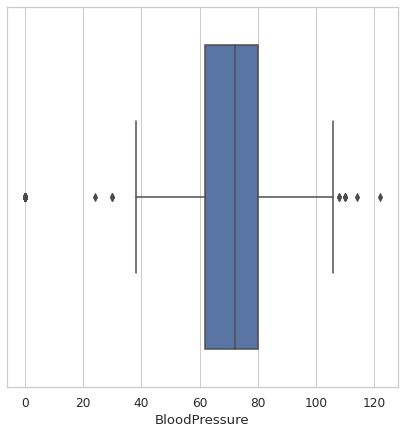

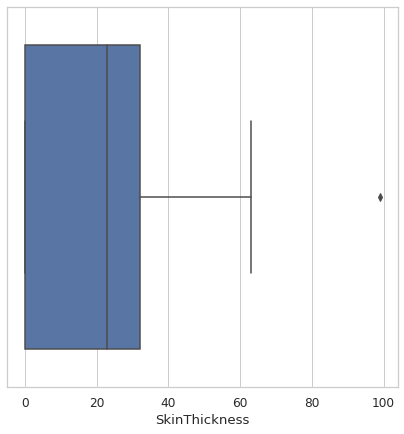

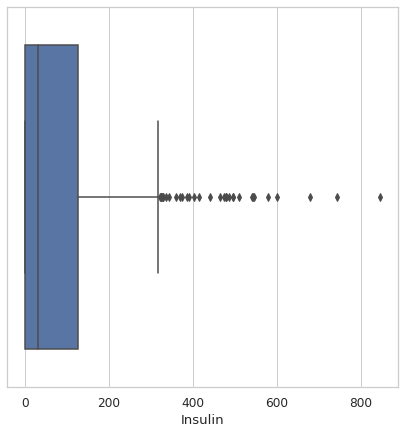

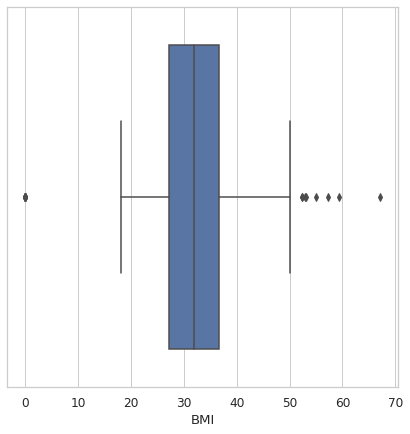

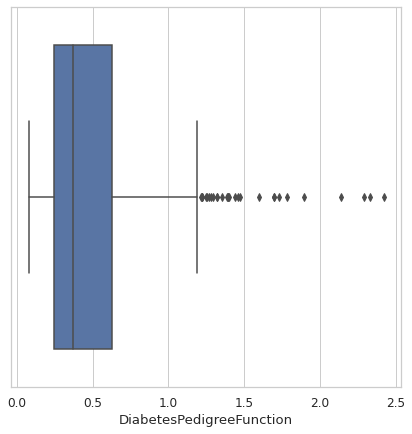

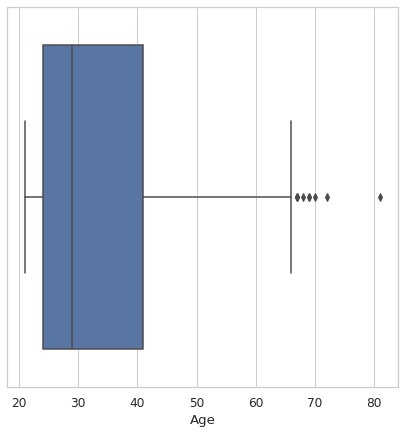

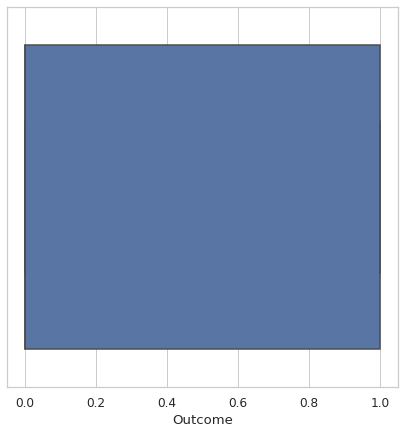

In [ ]:
for x in df.select_dtypes(np.number).columns:
    sns.boxplot(x=df[x])
    plt.show()

##Removing Outliers

In [ ]:
df.drop(df[df["Pregnancies"] > 14].index,inplace=True)
df.drop(df[df["BloodPressure"] >120].index,inplace=True)
df.drop(df[df["SkinThickness"] > 80].index,inplace=True)
df.drop(df[df["Insulin"] > 600].index,inplace=True)
df.drop(df[df["BMI"] > 55].index,inplace=True)
df.drop(df[df["DiabetesPedigreeFunction"] > 2].index,inplace=True)
df.drop(df[df["Age"] > 70].index,inplace=True)

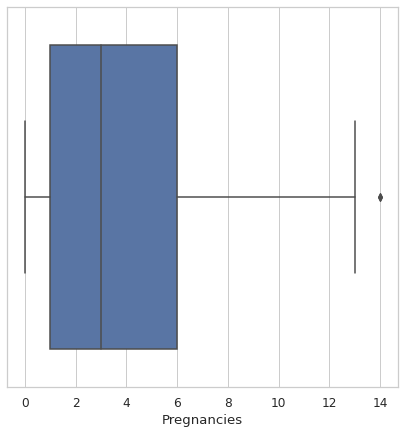

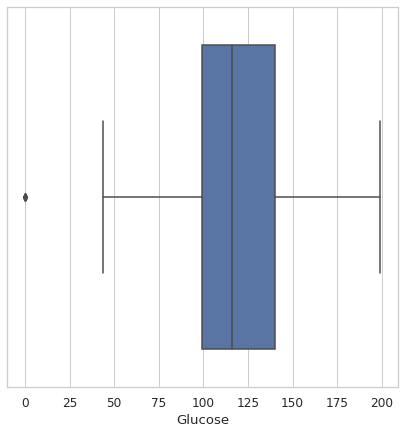

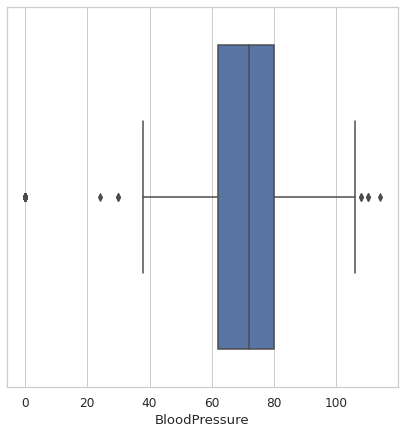

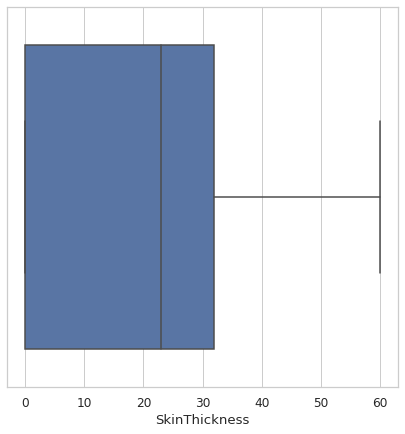

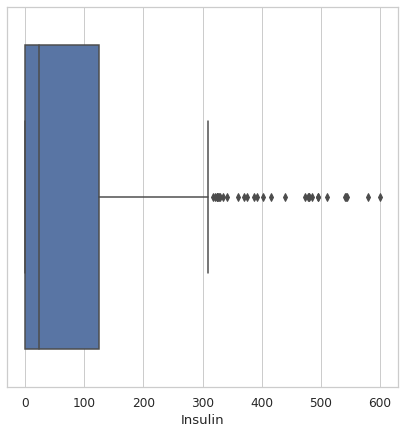

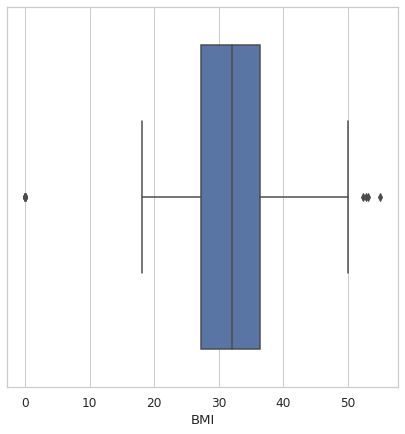

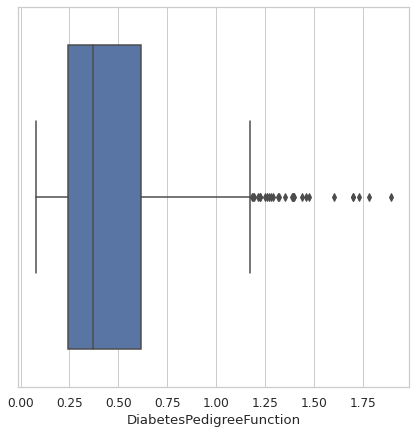

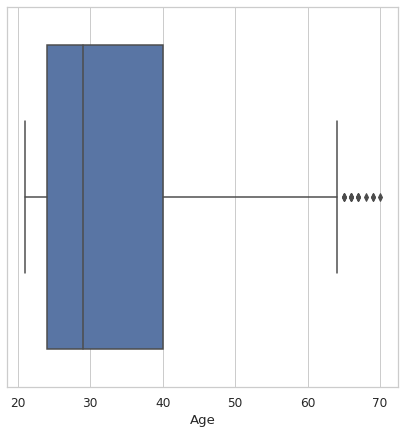

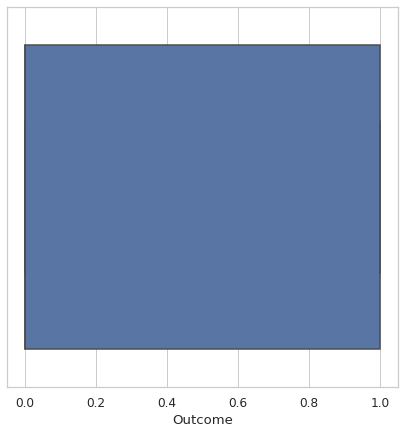

In [ ]:
for x in df.select_dtypes(np.number).columns:
    sns.boxplot(x=df[x])
    plt.show()

In [ ]:
df.shape

(754, 9)

##Replacing the zero-values

In [ ]:
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
df = [df1, df2]
df = pd.concat(df)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0.0,33.6,0.627,50,1
2,8,183.0,64,26,0.0,23.3,0.672,32,1
6,3,78.0,50,32,88.0,31.0,0.248,26,1
8,2,197.0,70,45,543.0,30.5,0.158,53,1
9,8,125.0,96,26,0.0,34.2,0.232,54,1
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62,21,37.5,22.5,0.142,33,0
763,10,101.0,76,48,180.0,32.9,0.171,63,0
764,2,122.0,70,27,37.5,36.8,0.340,27,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0


In [ ]:
df.isin([0]).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

##Pearson Correlation with 70% Threshold

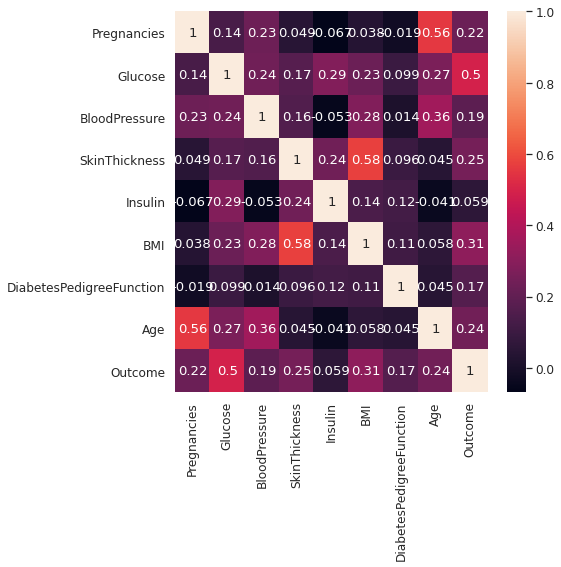

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)

##Splitting and Standardizing the Dataset

In [ ]:
Y = df['Outcome']
X = df.drop('Outcome', axis = 1)
cols=X.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std_df = pd.DataFrame(X_std, columns = cols)
X_std_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.650738,0.892665,-0.021358,0.897064,-0.886336,0.199202,0.541658,1.467692
1,1.253510,2.054102,-0.695871,-0.120909,-0.886336,-1.363070,0.689159,-0.094991
2,-0.253420,-1.430209,-1.876269,0.557740,-0.001840,-0.195158,-0.700627,-0.615885
3,-0.554806,2.518676,-0.189986,2.028146,4.571408,-0.270997,-0.995629,1.728139
4,1.253510,0.129435,2.002181,-0.120909,-0.886336,0.290208,-0.753072,1.814954
...,...,...,...,...,...,...,...,...
749,1.554896,-1.065186,-0.864499,-0.686449,-0.509420,-1.484412,-1.048073,-0.008175
750,1.856282,-0.666979,0.315898,2.367470,0.922861,0.093028,-0.953017,2.596295
751,-0.554806,0.029883,-0.189986,-0.007801,-0.509420,0.684568,-0.399070,-0.529069
752,0.349352,-0.003301,-0.021358,-0.460233,0.239387,-0.923207,-0.710460,-0.268622


In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, Y_train, Y_test = train_test_split(X_std_df, Y, test_size=1 - train_ratio)

# test is now 30% of the initial data set
# validation is now 20% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train, X_val, X_test)
print(Y_train, Y_val, Y_test)

NameError: ignored

In [ ]:
sns.histplot(Y_train)

high imbalance is seen and this is correted using SMOTE

##Applying SMOTE to balance the Target Class

Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. Remember it is always done on the Training Date and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.


In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, Y_train = smt.fit_sample(X_train, Y_train)
print(np.bincount(Y_train))

In [ ]:
params1 = {'C' : [0.001,0.01,0.1,1,10,100,500], 'tol' : [0.01,0.1,1,10,100]}
params2 = {'C' : [0.001,0.01,0.1,1,10,100,500], 'degree' : [2,3,4,5]}

In [ ]:
Gs_lin = GSCV(SVC(kernel='linear'),params1)
Gs_lin.fit(X_val,Y_val)
print(Gs_lin.cv_results_)
lin = Gs_lin.best_estimator_

In [ ]:
Gs_poly = GSCV(SVC(kernel='poly'),params2)
Gs_poly.fit(X_val,Y_val)
print(Gs_poly.cv_results_)
poly = Gs_poly.best_estimator_

In [ ]:
Gs_rbf = GSCV(SVC(kernel='rbf'),params1)
Gs_rbf.fit(X_val,Y_val)
print(Gs_rbf.cv_results_)
rbf = Gs_rbf.best_estimator_

In [ ]:
print("Linear Kernel SVM: \n",lin)
print("\n")
print("Radial Basis Function Kernel SVM: \n",rbf)
print("\n")
print("Polynomial Kernel SVM: \n",poly)

In [ ]:
lin.fit(X_train,Y_train)
rbf.fit(X_train,Y_train)
poly.fit(X_train,Y_train)

In [ ]:
lda = LDA(n_components=2)
x = lda.fit_transform(X, Y)
Y = Y.to_numpy()

In [ ]:
lin_lda =  Gs_lin.best_estimator_
rbf_lda =  Gs_rbf.best_estimator_
poly_lda =  Gs_poly.best_estimator_

In [ ]:
lin_lda.fit(x,Y)
rbf_lda.fit(x,Y)
poly_lda.fit(x,Y)

In [ ]:
svm_models = [lin_lda, poly_lda, rbf_lda]

In [ ]:
for i in range(len(svm_models)):
  plt.figure(figsize=(10,10))
  ax = plot_decision_regions(x,Y, clf=svm_models[i], legend=2)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles,['Class 0', 'Class 1'],framealpha=0.3, scatterpoints=1)
  plt.show()

In [ ]:
lsv=lin.support_vectors_.shape[0]
psv=poly.support_vectors_.shape[0]
rsv=rbf.support_vectors_.shape[0]

In [ ]:
print("Number of Support Vectors for Linear Kernalised SVM Classifier:",lsv)
print("Number of Support Vectors for Polynomial Kernalised SVM Classifier = ",psv)
print("Number of Support Vectors for Radial Basis Fucntion Kernalised SVM Classifier = ",rsv)

In [ ]:
score_lin=lin.score(X_test,Y_test)*100
score_poly=poly.score(X_test,Y_test)*100
score_rbf=rbf.score(X_test,Y_test)*100
print("Test Accuracy for Linear Kernalised SVM Classifier:",score_lin," %")
print("Test Accuracy for Polynomial Kernalised SVM Classifier:",score_poly," %")
print("Test Accuracy for RBF Kernalised SVM Classifier:",score_rbf," %")